In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

from scipy import stats
# to suppress warnings
#from warnings import filterwarnings
#filterwarnings('ignore')

from statsmodels.stats import weightstats

from matplotlib import gridspec

In [2]:
df=pd.read_csv('training.csv')

In [5]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RefId,72983.0,36511.428497,21077.241302,1.0,18257.5,36514.0,54764.5,73014.0
IsBadBuy,72983.0,0.122988,0.328425,0.0,0.0,0.0,0.0,1.0
VehYear,72983.0,2005.343052,1.731252,2001.0,2004.0,2005.0,2007.0,2010.0
VehicleAge,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
WheelTypeID,69814.0,1.494299,0.521290,0.0,1.0,1.0,2.0,3.0
VehOdo,72983.0,71499.995917,14578.913128,4825.0,61837.0,73361.0,82436.0,115717.0
MMRAcquisitionAuctionAveragePrice,72965.0,6128.909217,2461.992768,0.0,4273.0,6097.0,7765.0,35722.0
MMRAcquisitionAuctionCleanPrice,72965.0,7373.636031,2722.491986,0.0,5406.0,7303.0,9021.0,36859.0
MMRAcquisitionRetailAveragePrice,72965.0,8497.034332,3156.285284,0.0,6280.0,8444.0,10651.0,39080.0
MMRAcquisitonRetailCleanPrice,72965.0,9850.928240,3385.789541,0.0,7493.0,9789.0,12088.0,41482.0


In [6]:
cols=df.columns.to_list()
cols

['RefId',
 'IsBadBuy',
 'PurchDate',
 'Auction',
 'VehYear',
 'VehicleAge',
 'Make',
 'Model',
 'Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelTypeID',
 'WheelType',
 'VehOdo',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'PRIMEUNIT',
 'AUCGUART',
 'BYRNO',
 'VNZIP1',
 'VNST',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost']

In [7]:
for i in cols:
    print(i," : ", df[i].dtype)
    print(df[i].unique(),'\n')
    
    print('***********************************')

RefId  :  int64
[    1     2     3 ... 73012 73013 73014] 

***********************************
IsBadBuy  :  int64
[0 1] 

***********************************
PurchDate  :  object
['12/7/2009' '12/14/2009' '12/21/2009' '12/28/2009' '1/4/2010' '1/11/2010'
 '1/18/2010' '1/25/2010' '2/1/2010' '2/8/2010' '2/15/2010' '2/22/2010'
 '3/1/2010' '3/8/2010' '3/15/2010' '3/22/2010' '3/29/2010' '4/5/2010'
 '4/12/2010' '4/19/2010' '4/26/2010' '5/3/2010' '5/10/2010' '5/17/2010'
 '5/24/2010' '6/2/2010' '9/27/2010' '10/4/2010' '10/11/2010' '10/18/2010'
 '10/25/2010' '11/1/2010' '11/8/2010' '11/15/2010' '11/22/2010'
 '11/29/2010' '12/6/2010' '12/13/2010' '12/20/2010' '2/18/2009'
 '8/19/2009' '8/26/2009' '9/2/2009' '9/9/2009' '9/16/2009' '9/23/2009'
 '9/30/2009' '10/7/2009' '2/24/2010' '3/3/2010' '3/10/2010' '3/17/2010'
 '3/24/2010' '3/25/2010' '3/31/2010' '4/14/2010' '4/28/2010' '5/12/2010'
 '6/9/2010' '6/16/2010' '6/23/2010' '6/30/2010' '7/7/2010' '7/14/2010'
 '7/21/2010' '8/4/2010' '8/11/2010' '8/18/2

In [8]:
df.drop(columns='VNZIP1',inplace=True)
df.drop(columns='SubModel',inplace=True)
df.drop(columns='BYRNO',inplace=True)

In [9]:
# VNZIP1, submodel,

In [10]:
df['PurchDate']=pd.to_datetime(df['PurchDate'])

In [11]:
df['PurchDate'].unique()

<DatetimeArray>
['2009-12-07 00:00:00', '2009-12-14 00:00:00', '2009-12-21 00:00:00',
 '2009-12-28 00:00:00', '2010-01-04 00:00:00', '2010-01-11 00:00:00',
 '2010-01-18 00:00:00', '2010-01-25 00:00:00', '2010-02-01 00:00:00',
 '2010-02-08 00:00:00',
 ...
 '2009-11-27 00:00:00', '2010-11-26 00:00:00', '2009-11-08 00:00:00',
 '2010-01-15 00:00:00', '2010-01-29 00:00:00', '2010-01-08 00:00:00',
 '2010-02-20 00:00:00', '2010-12-04 00:00:00', '2010-12-24 00:00:00',
 '2010-12-30 00:00:00']
Length: 517, dtype: datetime64[ns]

In [12]:
df['Purchase_Year']=df['PurchDate'].dt.year

In [13]:
df['Purchase_Year'].dtype

dtype('int32')

In [14]:
df['Transmission'].replace('Manual','MANUAL',inplace=True)

In [15]:
df['Transmission'].unique()

array(['AUTO', 'MANUAL', nan], dtype=object)

In [16]:
# num=df.select_dtypes(include=np.number).columns.to_list()
# cat=df.select_dtypes(exclude=np.number).columns.to_list()

In [17]:
df.drop(columns='RefId',inplace=True)

In [18]:
df.drop(columns='PurchDate',inplace=True)

In [19]:
df['Purchase_Year']=df['Purchase_Year'].astype('int')

In [20]:
df['Purchase_Year'].dtype

dtype('int64')

In [21]:
df['Color'].replace('NOT AVAIL',np.nan, inplace=True)

In [22]:
# other

In [23]:
df['Color'].unique()

array(['RED', 'WHITE', 'MAROON', 'SILVER', 'BLACK', 'GOLD', 'GREY',
       'BLUE', 'BEIGE', 'PURPLE', 'ORANGE', 'GREEN', 'BROWN', 'YELLOW',
       nan, 'OTHER'], dtype=object)

In [24]:
(((df.isnull().sum()/len(df))*100)>0) & (((df.isnull().sum()/len(df))*100)<1) 

IsBadBuy                             False
Auction                              False
VehYear                              False
VehicleAge                           False
Make                                 False
Model                                False
Trim                                 False
Color                                 True
Transmission                          True
WheelTypeID                          False
WheelType                            False
VehOdo                               False
Nationality                           True
Size                                  True
TopThreeAmericanName                  True
MMRAcquisitionAuctionAveragePrice     True
MMRAcquisitionAuctionCleanPrice       True
MMRAcquisitionRetailAveragePrice      True
MMRAcquisitonRetailCleanPrice         True
MMRCurrentAuctionAveragePrice         True
MMRCurrentAuctionCleanPrice           True
MMRCurrentRetailAveragePrice          True
MMRCurrentRetailCleanPrice            True
PRIMEUNIT  

In [25]:
index=df[df[['Color','Transmission','Nationality','Size','TopThreeAmericanName','MMRAcquisitionAuctionAveragePrice',
'MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice']].isnull().any(axis=1)].index

In [26]:
df.drop(index,inplace=True)

In [27]:
(df.isnull().sum()/len(df))*100

IsBadBuy                              0.000000
Auction                               0.000000
VehYear                               0.000000
VehicleAge                            0.000000
Make                                  0.000000
Model                                 0.000000
Trim                                  3.245187
Color                                 0.000000
Transmission                          0.000000
WheelTypeID                           4.313136
WheelType                             4.320026
VehOdo                                0.000000
Nationality                           0.000000
Size                                  0.000000
TopThreeAmericanName                  0.000000
MMRAcquisitionAuctionAveragePrice     0.000000
MMRAcquisitionAuctionCleanPrice       0.000000
MMRAcquisitionRetailAveragePrice      0.000000
MMRAcquisitonRetailCleanPrice         0.000000
MMRCurrentAuctionAveragePrice         0.000000
MMRCurrentAuctionCleanPrice           0.000000
MMRCurrentRet

In [28]:
df.drop(columns='WheelTypeID' ,inplace=True) 

In [29]:
df['WheelType'].fillna(df['WheelType'].mode()[0],inplace=True)

In [30]:
df['WheelType'].isnull().sum()

0

In [31]:
df['Trim'].fillna(df['Trim'].mode()[0],inplace=True)

In [32]:
df['Trim'].isnull().sum()

0

In [33]:
(df.isnull().sum()/len(df))*100

IsBadBuy                              0.000000
Auction                               0.000000
VehYear                               0.000000
VehicleAge                            0.000000
Make                                  0.000000
Model                                 0.000000
Trim                                  0.000000
Color                                 0.000000
Transmission                          0.000000
WheelType                             0.000000
VehOdo                                0.000000
Nationality                           0.000000
Size                                  0.000000
TopThreeAmericanName                  0.000000
MMRAcquisitionAuctionAveragePrice     0.000000
MMRAcquisitionAuctionCleanPrice       0.000000
MMRAcquisitionRetailAveragePrice      0.000000
MMRAcquisitonRetailCleanPrice         0.000000
MMRCurrentAuctionAveragePrice         0.000000
MMRCurrentAuctionCleanPrice           0.000000
MMRCurrentRetailAveragePrice          0.000000
MMRCurrentRet

In [34]:
from scipy.stats import chi2_contingency

In [35]:
observed_values=pd.crosstab(df['PRIMEUNIT'],df['IsBadBuy'])
observed_values

IsBadBuy,0,1
PRIMEUNIT,,
NO,3216,126
YES,56,6


In [36]:
test_stat,p,dof,expected_value=chi2_contingency(observed_values,correction=False)

In [37]:
p

0.016978596220905133

In [38]:
observed_values_1=pd.crosstab(df['AUCGUART'],df['IsBadBuy'])
observed_values

IsBadBuy,0,1
PRIMEUNIT,,
NO,3216,126
YES,56,6


In [39]:
test_stat,p,dof,expected_value=chi2_contingency(observed_values_1,correction=False)

In [40]:
p

0.0036056579874070294

In [41]:
observed_values_2=pd.crosstab(df['VehicleAge'],df['AUCGUART'])
observed_values

IsBadBuy,0,1
PRIMEUNIT,,
NO,3216,126
YES,56,6


In [42]:
test_stat,p,dof,expected_value=chi2_contingency(observed_values_2,correction=False)

In [43]:
print(test_stat)
print(p)

56.79939407807818
1.9705362322314893e-09


In [44]:
observed_values_1=pd.crosstab(df['Make'],df['AUCGUART'])
observed_values

IsBadBuy,0,1
PRIMEUNIT,,
NO,3216,126
YES,56,6


In [45]:
p

1.9705362322314893e-09

In [46]:
df.columns

Index(['IsBadBuy', 'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim',
       'Color', 'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'VNST',
       'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'Purchase_Year'],
      dtype='object')

In [47]:
columns=['VehYear','VehicleAge','Make','Auction','Size','IsOnlineSale','Trim','Model','Color',
        'Transmission','WheelType','Purchase_Year']

for i in columns:
    observed_values=pd.crosstab(df[i],df['PRIMEUNIT'])
    print(observed_values)
    test_stat,p,dof,expected_value=chi2_contingency(observed_values,correction=False)
    print('test_stat:',test_stat,'p_value:',p)
    print('************************')

PRIMEUNIT   NO  YES
VehYear            
2001       103    0
2002       155    1
2003       281    4
2004       427   13
2005       693   14
2006       700   17
2007       530    6
2008       354    7
2009        99    0
test_stat: 11.216574069600325 p_value: 0.18972719464738336
************************
PRIMEUNIT    NO  YES
VehicleAge          
1            99    1
2           354    7
3           530    6
4           700   16
5           693   14
6           427   13
7           281    4
8           155    1
9           103    0
test_stat: 9.229872345600318 p_value: 0.32327700600250153
************************
PRIMEUNIT    NO  YES
Make                
ACURA         0    2
BUICK        37    0
CADILLAC      1    0
CHEVROLET   816   10
CHRYSLER    402    1
DODGE       430   18
FORD        594   15
GMC          19    2
HONDA        16    0
HYUNDAI     103    0
INFINITI      2    1
ISUZU         8    0
JEEP         69    2
KIA         160    0
LEXUS         2    1
LINCOLN       7    1
MAZD

In [48]:
columns=['VehYear','VehicleAge','Make','Auction','Size','IsOnlineSale','Trim','Model','Color',
        'Transmission','WheelType','Purchase_Year']

for i in columns:
    observed_values=pd.crosstab(df[i],df['AUCGUART'])
    print(observed_values)
    test_stat,p,dof,expected_value=chi2_contingency(observed_values,correction=False)
    print('test_stat:',test_stat,'p_value:',p)
    print('************************')

AUCGUART  GREEN  RED
VehYear             
2001         96    7
2002        146   10
2003        271   14
2004        427   13
2005        683   24
2006        708    9
2007        535    1
2008        360    1
2009         99    0
test_stat: 56.79243401456387 p_value: 1.976705269466267e-09
************************
AUCGUART    GREEN  RED
VehicleAge            
1             100    0
2             360    1
3             535    1
4             707    9
5             683   24
6             427   13
7             271   14
8             146   10
9              96    7
test_stat: 56.79939407807818 p_value: 1.9705362322314893e-09
************************
AUCGUART    GREEN  RED
Make                  
ACURA           2    0
BUICK          37    0
CADILLAC        1    0
CHEVROLET     812   14
CHRYSLER      390   13
DODGE         439    9
FORD          592   17
GMC            19    2
HONDA          16    0
HYUNDAI        99    4
INFINITI        3    0
ISUZU           8    0
JEEP           71    0


In [49]:
ttest_col=['VehOdo','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice',
           'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
           'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice',
           'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','VehBCost',
          'WarrantyCost']

In [50]:
for i in ttest_col:
    PRIMEUNIT=  df[(df['PRIMEUNIT'] == 'YES')][i]
    
    PRIMEUNIT2=  df[(df['PRIMEUNIT'] == 'NO')][i]
    
    stat,p=stats.levene(PRIMEUNIT,PRIMEUNIT2)
    
    if p<0.05:
        print(i,' :',)

        t_stat,p_value=stats.ttest_ind(PRIMEUNIT,PRIMEUNIT2,equal_var=True)
        print(t_stat,p_value)

MMRAcquisitionAuctionAveragePrice  :
18.237146767898093 5.676097789174689e-71
MMRAcquisitionAuctionCleanPrice  :
19.154266491713383 9.604318425269426e-78
MMRCurrentAuctionCleanPrice  :
16.093491105160613 3.2089274517235945e-56
VehBCost  :
21.729593813102557 3.795770722979089e-98


In [51]:
df['AUCGUART'].unique()

array([nan, 'GREEN', 'RED'], dtype=object)

In [52]:
for i in ttest_col:
    AUCGUART=  df[(df['AUCGUART'] == 'GREEN')][i]
    
    AUCGUART2=  df[(df['AUCGUART'] == 'RED')][i]
    
    stat,p=stats.levene(AUCGUART,AUCGUART2)
    
    if p<0.05:
        print(i,' :',)

        t_stat,p_value=stats.ttest_ind(AUCGUART,AUCGUART2,equal_var=True)
        print(t_stat,p_value)

MMRAcquisitionAuctionAveragePrice  :
8.157498201911102 4.761646251232265e-16
MMRAcquisitionAuctionCleanPrice  :
8.14843404456702 5.125029492943639e-16
MMRAcquisitionRetailAveragePrice  :
8.340555475815732 1.0607918316895804e-16
MMRAcquisitonRetailCleanPrice  :
8.476697306884091 3.403182574998193e-17
MMRCurrentAuctionAveragePrice  :
8.463368743996844 3.806739035772789e-17
MMRCurrentAuctionCleanPrice  :
8.489142134118193 3.06464228627463e-17
MMRCurrentRetailAveragePrice  :
8.445230493533403 4.4326995017453476e-17
MMRCurrentRetailCleanPrice  :
8.306963070833572 1.4005935326349177e-16
VehBCost  :
11.39570342061941 1.4987580523157082e-29


In [53]:
df['AUCGUART'].unique()

array([nan, 'GREEN', 'RED'], dtype=object)

In [54]:
df['PRIMEUNIT'].unique()

array([nan, 'NO', 'YES'], dtype=object)

# imputing the cat columns

In [55]:
# Categorical groups for mode calculation
categorical_groups = ['Model', 'Trim', 'Size', 'Make', 'Purchase_Year']

# Calculate mode for PRIMEUNIT based on these groups
mode_by_group = (df.groupby(categorical_groups)['PRIMEUNIT']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .reset_index())
mode_by_group = mode_by_group.rename(columns={'PRIMEUNIT': 'ModePRIMEUNIT'})

# merging the original and new mode column

In [56]:
# Merge mode values
df = df.merge(mode_by_group, on=categorical_groups, how='left')

# Impute missing PRIMEUNIT values using the new mode
df['PRIMEUNIT'] = df['PRIMEUNIT'].fillna(df['ModePRIMEUNIT'])

In [57]:
(df['PRIMEUNIT'].isnull().sum()/len(df['PRIMEUNIT']))*100

50.30936074632418

# further imputation

In [58]:
# data = {
#     'PRIMEUNIT': list(df['PRIMEUNIT'].unique()),
#     'VehBCost': list(df['VehBCost'].unique()),
#     'AcquisitionAuctionCleanPrice': list(df['MMRAcquisitionRetailAveragePrice'].unique())
# }
# dff= pd.DataFrame(data)

In [59]:
# dff=df.copy()

In [60]:
# Step 1: Fill Missing PRIMEUNIT with Mode-Based Grouping (Assuming Mode Imputation is Done)
# For simplicity, let's say all NaNs were imputed as 'YES' from the mode logic
df['PRIMEUNIT'] = df['PRIMEUNIT'].fillna('YES')

# Step 2: Define Logical Refinement Condition
# Condition for inconsistency: Vehicles with PRIMEUNIT='YES' should have higher costs
condition = (df['PRIMEUNIT'] == 'YES') & (df['VehBCost'] < df['MMRAcquisitionAuctionCleanPrice'])

# Step 3: Refine PRIMEUNIT Based on the Condition
df.loc[condition, 'PRIMEUNIT'] = 'NO'

# Output the refined DataFrame
df

,IsBadBuy,Auction,VehYear,VehicleAge,Make,Model,Trim,Color,Transmission,WheelType,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,VNST,VehBCost,IsOnlineSale,WarrantyCost,Purchase_Year,ModePRIMEUNIT
0,0,ADESA,2006,3,MAZDA,MAZDA3,i,RED,AUTO,Alloy,...,11597.0,12409.0,NO,NaN,FL,7100.0,0,1113,2009,NaN
1,0,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,WHITE,AUTO,Alloy,...,11374.0,12791.0,NO,NaN,FL,7600.0,0,1053,2009,NaN
2,0,ADESA,2005,4,DODGE,STRATUS V6,SXT,MAROON,AUTO,Covers,...,7146.0,8702.0,YES,NaN,FL,4900.0,0,1389,2009,NaN
3,0,ADESA,2004,5,DODGE,NEON,SXT,SILVER,AUTO,Alloy,...,4375.0,5518.0,YES,NaN,FL,4100.0,0,630,2009,NaN
4,0,ADESA,2005,4,FORD,FOCUS,ZX3,SILVER,MANUAL,Covers,...,6739.0,7911.0,NO,NaN,FL,4000.0,0,1020,2009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72564,1,ADESA,2001,8,MERCURY,SABLE,GS,BLACK,AUTO,Alloy,...,4836.0,5937.0,YES,NaN,GA,4200.0,0,993,2009,NaN
72565,0,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,SILVER,AUTO,Alloy,...,10151.0,11652.0,NO,NaN,GA,6200.0,0,1038,2009,NaN
72566,0,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,SILVER,AUTO,Alloy,...,11831.0,14402.0,NO,NaN,GA,8200.0,0,1893,2009,NaN
72567,0,ADESA,2006,3,CHEVROLET,IMPALA,LS,WHITE,AUTO,Alloy,...,10099.0,11228.0,NO,NaN,GA,7000.0,0,1974,2009,NaN


In [61]:
df['PRIMEUNIT'].value_counts()

PRIMEUNIT
NO     60527
YES    12042
Name: count, dtype: int64

In [62]:
df.columns

Index(['IsBadBuy', 'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim',
       'Color', 'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'VNST',
       'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'Purchase_Year',
       'ModePRIMEUNIT'],
      dtype='object')

# imputing AUCGUART

In [63]:
# Categorical groups for mode calculation
categorical_groups = ['Model', 'Trim', 'Size', 'VehicleAge','Make']

# Calculate mode for PRIMEUNIT based on these groups
mode_by_group = (df.groupby(categorical_groups)['AUCGUART']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .reset_index())
mode_by_group = mode_by_group.rename(columns={'AUCGUART': 'ModeAUCGUART'})

# merging the original and new mode column

In [64]:
# Merge mode values
df = df.merge(mode_by_group, on=categorical_groups, how='left')

# Impute missing PRIMEUNIT values using the new mode
df['AUCGUART'] = df['AUCGUART'].fillna(df['ModeAUCGUART'])

In [65]:
(df['AUCGUART'].isnull().sum()/len(df['AUCGUART']))*100

49.30204357232427

In [66]:
# dff=df.copy()

# further imputation

In [67]:
# Define thresholds
df['Green_Threshold'] = 1.5 * df['VehBCost']
df['Red_Threshold'] = 1.2 * df['MMRCurrentAuctionAveragePrice']


def impute_aucguart(row):
    if (row['MMRCurrentAuctionCleanPrice'] > row['Green_Threshold'] and 
        row['MMRAcquisitonRetailCleanPrice'] > row['MMRCurrentAuctionAveragePrice']):
        
        return "Green"

    elif (row['MMRCurrentAuctionAveragePrice'] < row['Red_Threshold'] or 
          row['VehicleAge'] > 10):
        
        return "Red"
    elif (row['VehBCost'] >= row['Red_Threshold'] and 
          row['VehBCost'] <= row['Green_Threshold']):
        
        return "Yellow"
    else:
        
        return np.nan

# Impute AUCGUART
df['AUCGUART'] = df.apply(impute_aucguart, axis=1)


In [68]:
df['AUCGUART'].unique()

array(['Red', 'Green', 'Yellow'], dtype=object)

# now grouping the classes in the columns

In [69]:
num=df.select_dtypes(include=np.number).columns.to_list()
cat=df.select_dtypes(exclude=np.number).columns.to_list()

In [70]:
for i in ['IsBadBuy','VehYear','VehicleAge','IsOnlineSale']:
    num.remove(i)

In [71]:
df[['IsBadBuy','VehYear','VehicleAge','IsOnlineSale']]=df[['IsBadBuy','VehYear','VehicleAge','IsOnlineSale']].astype('object')

In [72]:
cat=df.select_dtypes(exclude=np.number).columns.to_list()

In [73]:
for i in cat:
    print(i," : ", df[i].dtype)
    print(df[i].unique(),'\n')

    print('***********************************')

IsBadBuy  :  object
[0 1] 

***********************************
Auction  :  object
['ADESA' 'OTHER' 'MANHEIM'] 

***********************************
VehYear  :  object
[2006 2004 2005 2007 2001 2003 2002 2008 2009 2010] 

***********************************
VehicleAge  :  object
[3 5 4 2 8 6 7 9 1 0] 

***********************************
Make  :  object
['MAZDA' 'DODGE' 'FORD' 'MITSUBISHI' 'KIA' 'GMC' 'NISSAN' 'CHEVROLET'
 'SATURN' 'CHRYSLER' 'MERCURY' 'HYUNDAI' 'TOYOTA' 'PONTIAC' 'SUZUKI'
 'JEEP' 'HONDA' 'OLDSMOBILE' 'BUICK' 'SCION' 'VOLKSWAGEN' 'ISUZU'
 'LINCOLN' 'MINI' 'SUBARU' 'CADILLAC' 'VOLVO' 'INFINITI' 'PLYMOUTH'
 'LEXUS' 'ACURA' 'TOYOTA SCION' 'HUMMER'] 

***********************************
Model  :  object
['MAZDA3' '1500 RAM PICKUP 2WD' 'STRATUS V6' ... 'ALTIMA 3.5L V6 MPI /'
 'EXCURSION 4WD V8 5.4' 'M45 4.5L V8 MPI / SF'] 

***********************************
Trim  :  object
['i' 'ST' 'SXT' 'ZX3' 'ES' 'EX' 'SE' 'SEL' 'SLE' 'XL' 'Bas' 'LS' 'SS'
 'SLT' '150' 'Spo' 'LX' 'GLS' 

In [74]:
cat

['IsBadBuy',
 'Auction',
 'VehYear',
 'VehicleAge',
 'Make',
 'Model',
 'Trim',
 'Color',
 'Transmission',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'PRIMEUNIT',
 'AUCGUART',
 'VNST',
 'IsOnlineSale',
 'ModePRIMEUNIT',
 'ModeAUCGUART']

In [75]:
for i in cat:
    print(i,':')
    print(np.cumsum(df[i].value_counts()/len(df[i])*100),'\n')
    print('******************************************')

IsBadBuy :
IsBadBuy
0     87.709628
1    100.000000
Name: count, dtype: float64 

******************************************
Auction :
Auction
MANHEIM     56.288498
OTHER       80.202290
ADESA      100.000000
Name: count, dtype: float64 

******************************************
VehYear :
VehYear
2006     23.392909
2005     44.633383
2007     60.345327
2004     74.326503
2008     83.673469
2003     92.207416
2002     96.870565
2001     98.898979
2009     99.998622
2010    100.000000
Name: count, dtype: float64 

******************************************
VehicleAge :
VehicleAge
4     23.340545
3     45.154267
5     62.933208
2     74.586945
6     85.580620
7     91.955243
1     96.064435
8     99.109813
9     99.997244
0    100.000000
Name: count, dtype: float64 

******************************************
Make :
Make
CHEVROLET        23.687801
DODGE            41.406110
FORD             56.875525
CHRYSLER         68.891676
PONTIAC          74.727501
KIA              78.144938
SATURN

In [76]:
for i in cat:
    print(i,':')
    print(df[i].unique(),'\n')
    print('******************************************')

IsBadBuy :
[0 1] 

******************************************
Auction :
['ADESA' 'OTHER' 'MANHEIM'] 

******************************************
VehYear :
[2006 2004 2005 2007 2001 2003 2002 2008 2009 2010] 

******************************************
VehicleAge :
[3 5 4 2 8 6 7 9 1 0] 

******************************************
Make :
['MAZDA' 'DODGE' 'FORD' 'MITSUBISHI' 'KIA' 'GMC' 'NISSAN' 'CHEVROLET'
 'SATURN' 'CHRYSLER' 'MERCURY' 'HYUNDAI' 'TOYOTA' 'PONTIAC' 'SUZUKI'
 'JEEP' 'HONDA' 'OLDSMOBILE' 'BUICK' 'SCION' 'VOLKSWAGEN' 'ISUZU'
 'LINCOLN' 'MINI' 'SUBARU' 'CADILLAC' 'VOLVO' 'INFINITI' 'PLYMOUTH'
 'LEXUS' 'ACURA' 'TOYOTA SCION' 'HUMMER'] 

******************************************
Model :
['MAZDA3' '1500 RAM PICKUP 2WD' 'STRATUS V6' ... 'ALTIMA 3.5L V6 MPI /'
 'EXCURSION 4WD V8 5.4' 'M45 4.5L V8 MPI / SF'] 

******************************************
Trim :
['i' 'ST' 'SXT' 'ZX3' 'ES' 'EX' 'SE' 'SEL' 'SLE' 'XL' 'Bas' 'LS' 'SS'
 'SLT' '150' 'Spo' 'LX' 'GLS' 'CE' 'GT' 'Lar' '2' '

In [77]:
Others=['NISSAN','HYUNDAI','JEEP','SUZUKI','TOYOTA','MITSUBISHI','MAZDA','MERCURY','BUICK',
'GMC','HONDA','OLDSMOBILE','VOLKSWAGEN','ISUZU','SCION','LINCOLN','INFINITI','VOLVO','CADILLAC',
'ACURA', 'LEXUS','SUBARU','MINI','PLYMOUTH','TOYOTA SCION','HUMMER']  


In [78]:
len(Others)

26

In [79]:
df['Make'].replace(Others,'OTHERS', inplace=True)

In [80]:
df['Make'].unique()

array(['OTHERS', 'DODGE', 'FORD', 'KIA', 'CHEVROLET', 'SATURN',
       'CHRYSLER', 'PONTIAC'], dtype=object)

In [81]:
model_cumsum=np.cumsum(df['Model'].value_counts()/len(df['Model'])*100)


In [82]:
model_index=model_cumsum[model_cumsum>80].index.to_list()

In [83]:
len(model_index)

906

In [84]:
len(df['Model'].unique())

1060

In [85]:
df['Model'].replace(model_index,'OTHERS', inplace=True)


In [86]:
len(df['Model'].unique())

155

In [87]:
df_date=pd.read_csv('training.csv')

In [88]:
pd.to_datetime(df_date['PurchDate'])

0       2009-12-07
1       2009-12-07
2       2009-12-07
3       2009-12-07
4       2009-12-07
           ...    
72978   2009-12-02
72979   2009-12-02
72980   2009-12-02
72981   2009-12-02
72982   2009-12-02
Name: PurchDate, Length: 72983, dtype: datetime64[ns]

In [89]:
(df_date.isnull().sum()/len(df_date))*100

RefId                                 0.000000
IsBadBuy                              0.000000
PurchDate                             0.000000
Auction                               0.000000
VehYear                               0.000000
VehicleAge                            0.000000
Make                                  0.000000
Model                                 0.000000
Trim                                  3.233630
SubModel                              0.010961
Color                                 0.010961
Transmission                          0.012332
WheelTypeID                           4.342107
WheelType                             4.348958
VehOdo                                0.000000
Nationality                           0.006851
Size                                  0.006851
TopThreeAmericanName                  0.006851
MMRAcquisitionAuctionAveragePrice     0.024663
MMRAcquisitionAuctionCleanPrice       0.024663
MMRAcquisitionRetailAveragePrice      0.024663
MMRAcquisiton

In [90]:
df_date_index=df_date[df_date[['SubModel','Color','Transmission','Nationality','Size','TopThreeAmericanName','MMRAcquisitionAuctionAveragePrice',
'MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice']].isnull().any(axis=1)].index

In [91]:
df_date.drop(df_date_index,inplace=True)

In [92]:
df_date['PurchDate']=pd.to_datetime(df_date['PurchDate'])

In [93]:
df_date['Purchase_Month']=df_date['PurchDate'].dt.month

In [94]:
df_date.drop(columns='Purchase_Month',inplace=True)

In [95]:
current_date = pd.Timestamp.now()

In [96]:
df_date['month_since_purchase'] =(current_date.year - df_date['PurchDate'].dt.year) * 12 + \
                         (current_date.month - df_date['PurchDate'].dt.month)

In [97]:
df_date['month_since_purchase'].value_counts()

month_since_purchase
171    3930
172    3782
192    3595
185    3442
184    3386
186    3305
179    3222
180    3191
177    3188
176    3152
175    3147
173    3062
178    3005
190    2930
191    2899
174    2798
183    2721
170    2721
187    2705
181    2677
182    2642
189    2568
188    2510
193    2080
Name: count, dtype: int64

In [98]:
df['MONTHS_SINCE_PURCHASE']=df_date['month_since_purchase']

In [99]:
df.drop(columns='Purchase_Year', inplace=True)

In [100]:
state_to_time_zone = { 
'FL': 'Eastern',  
'VA': 'Eastern', 
'IA': 'Central', 
'AR': 'Central', 
'MN': 'Central', 
'TN': 'Central',
'PA': 'Eastern', 
'OH': 'Eastern', 
'AL': 'Central', 
'MI': 'Eastern',  
'TX': 'Central', 
'IL': 'Central', 
'MA': 'Eastern', 
'AZ': 'Mountain', 
'GA': 'Eastern', 
'NC': 'Eastern', 
'MD': 'Eastern', 
'CA': 'Pacific', 
'UT': 'Mountain', 
'OR': 'Pacific', 
'SC': 'Eastern', 
'CO': 'Mountain', 
'ID': 'Mountain', 
'NV': 'Pacific', 
'WV': 'Eastern', 
'MS': 'Central', 
'OK': 'Central', 
'NM': 'Mountain', 
'LA': 'Central', 
'IN': 'Eastern', 
'MO': 'Central', 
'WA': 'Pacific', 
'NH': 'Eastern', 
'NJ': 'Eastern', 
'NY': 'Eastern', 
'NE': 'Central',  
'KY': 'Eastern'  } 
 


In [101]:
df['TimeZone'] = df['VNST'].map(state_to_time_zone)  

In [102]:
df['TimeZone'].value_counts()

TimeZone
Eastern     30009
Central     22182
Mountain    12413
Pacific      7965
Name: count, dtype: int64

In [103]:
df.drop(columns=['VNST','Trim'], inplace=True)

In [104]:
df.columns.to_list()

['IsBadBuy',
 'Auction',
 'VehYear',
 'VehicleAge',
 'Make',
 'Model',
 'Color',
 'Transmission',
 'WheelType',
 'VehOdo',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'PRIMEUNIT',
 'AUCGUART',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost',
 'ModePRIMEUNIT',
 'ModeAUCGUART',
 'Green_Threshold',
 'Red_Threshold',
 'MONTHS_SINCE_PURCHASE',
 'TimeZone']

In [105]:
df.drop(columns=['ModePRIMEUNIT','ModeAUCGUART'], inplace=True)

In [106]:
df.drop(columns=['Green_Threshold','Red_Threshold'], inplace=True)

# OUTLIER

In [107]:
num=df.select_dtypes(include=np.number).columns.to_list()
cat=df.select_dtypes(exclude=np.number).columns.to_list()

In [108]:
num

['VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'VehBCost',
 'WarrantyCost',
 'MONTHS_SINCE_PURCHASE']

In [109]:
plt.rcParams['figure.figsize']=[15,22]

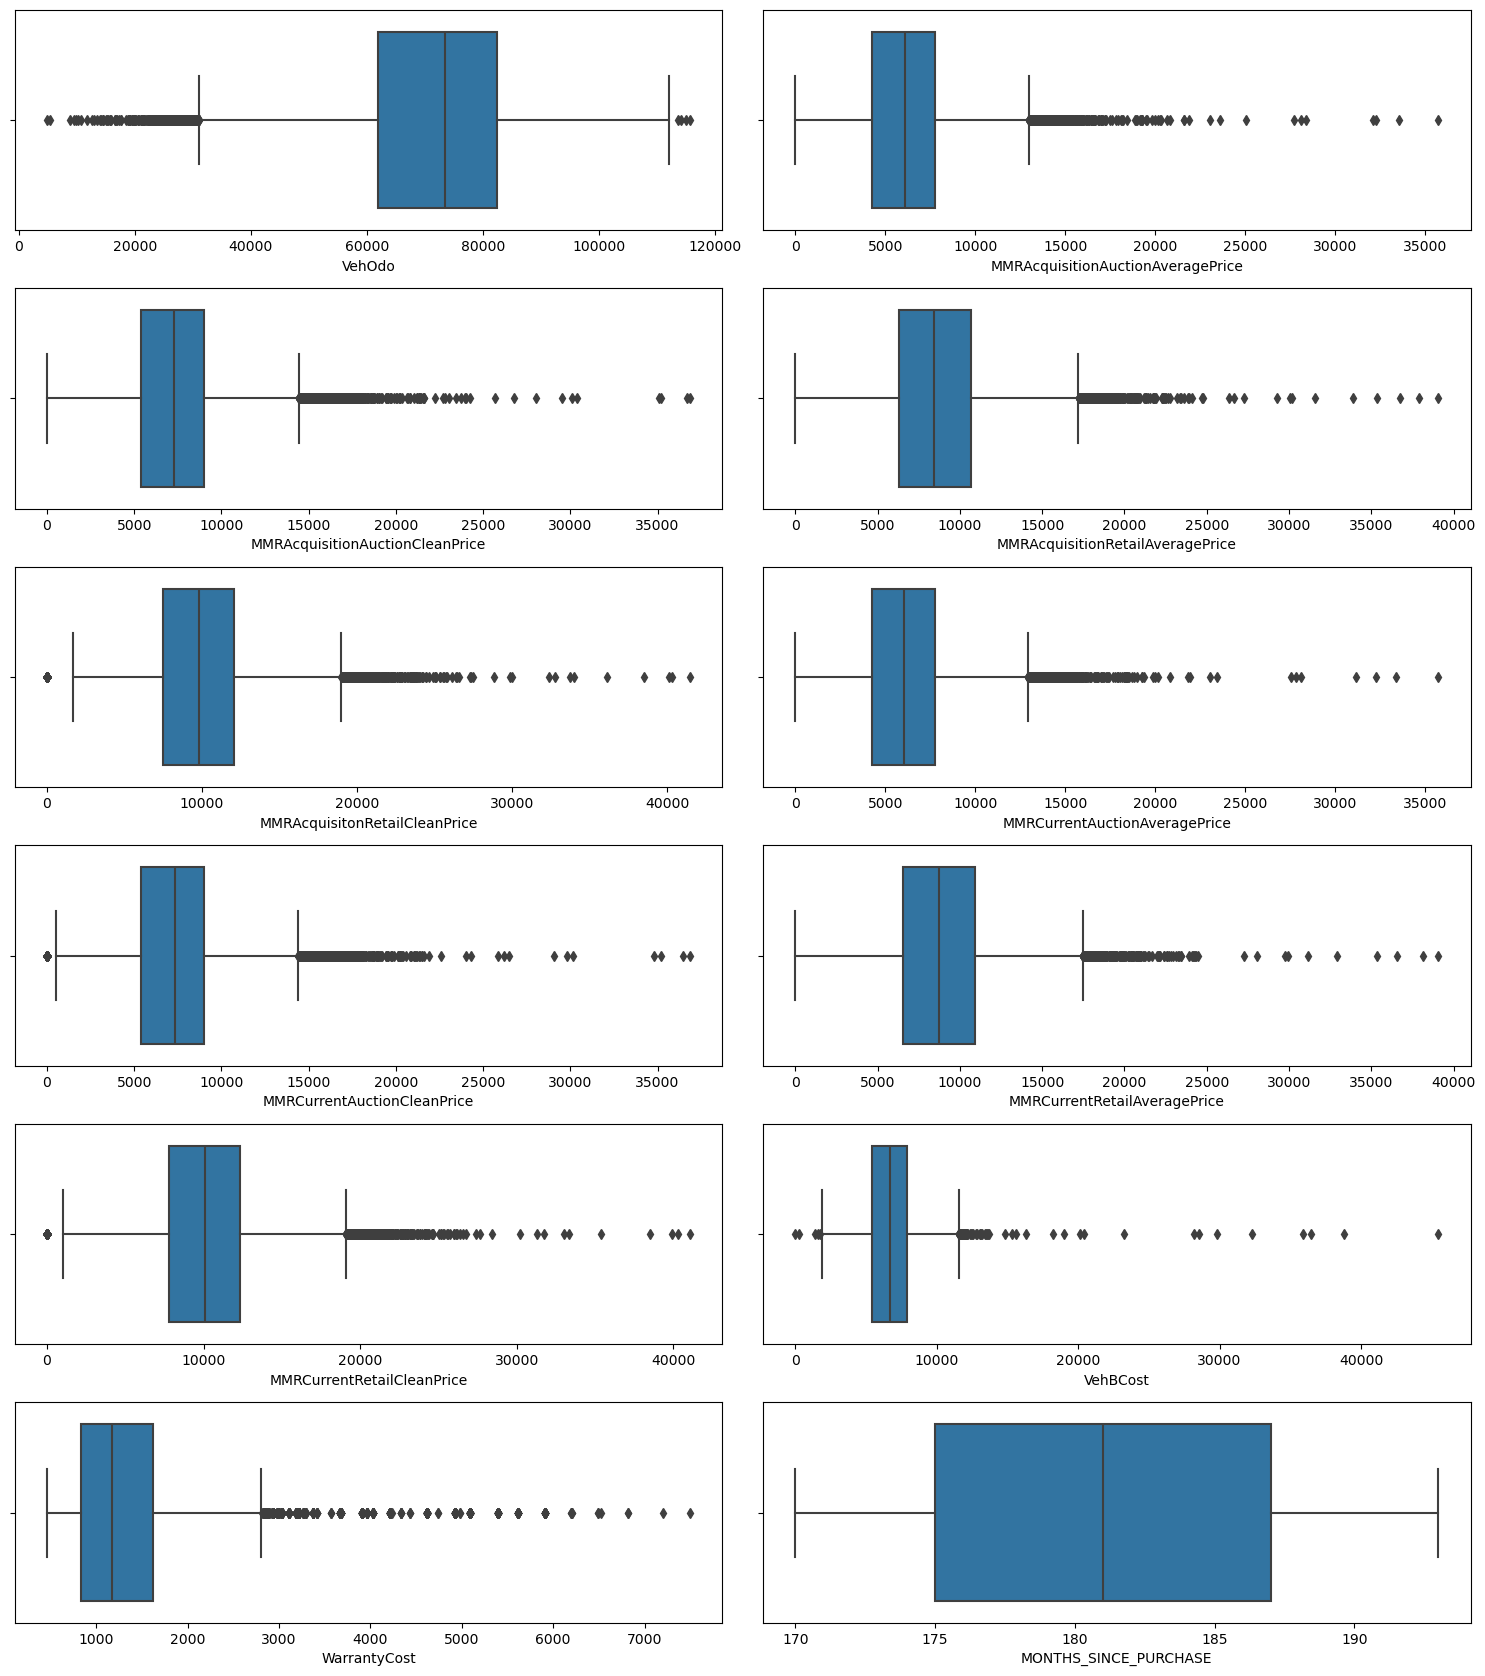

In [110]:
t=1
for i in num:
    plt.subplot(8,2,t)
    sns.boxplot(x=df[i])
    t+=1

plt.tight_layout()
plt.show()

In [111]:
num.remove('MONTHS_SINCE_PURCHASE')

In [112]:
num

['VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'VehBCost',
 'WarrantyCost']

In [113]:
# import your code here
IQR=df[num].quantile(0.80)-df[num].quantile(0.20)
IQR

VehOdo                               25643.8
MMRAcquisitionAuctionAveragePrice     4175.0
MMRAcquisitionAuctionCleanPrice       4465.4
MMRAcquisitionRetailAveragePrice      5389.0
MMRAcquisitonRetailCleanPrice         5612.0
MMRCurrentAuctionAveragePrice         4166.0
MMRCurrentAuctionCleanPrice           4430.0
MMRCurrentRetailAveragePrice          5306.4
MMRCurrentRetailCleanPrice            5477.0
VehBCost                              3015.0
WarrantyCost                           900.0
dtype: float64

In [114]:
Q1=df[num].quantile(0.20)
Q3=df[num].quantile(0.80)

In [115]:
LW=Q1-(1.5*IQR)
UW=Q3+(1.5*IQR)

outlayer=(len(df[((df[num]<LW)|(df[num]>UW)).any(axis=1)])/len(df))*100
outlayer

# [((df[num]<LW) | (df[num]>UW)).any(axis=1)]

1.5268227480053467

In [116]:
for i in num:
    Q1=df[i].quantile(0.20)
    Q3=df[i].quantile(0.80)
    IQR=df[i].quantile(0.80)-df[i].quantile(0.20)
    LW=Q1-(1.5*IQR)
    UW=Q3+(1.5*IQR)

    outlayer=(len(df[(df[i]<LW)|(df[i]>UW)])/len(df))*100
    print(outlayer)

    
    
    

0.062009949151841694
0.2852457660984718
0.35827970621064087
0.1350438892640108
0.187407846325566
0.28248976835838996
0.3872176824815004
0.12677589604376524
0.18051785197536138
0.041339966101227796
0.9342832338877483


In [117]:
dff=df[num].copy()

In [118]:
LW=Q1-(1.5*IQR)

In [119]:
for i in num:
    Q1=df[i].quantile(0.20)
    Q3=df[i].quantile(0.80)
    IQR=df[i].quantile(0.80)-df[i].quantile(0.20)
    LW=Q1-(1.5*IQR)
    UW=Q3+(1.5*IQR)

    LOWER_INDEX=df[df[i]<LW].index.to_list()
    UPPER_INDEX=df[df[i]>UW].index.to_list()
    df.loc[LOWER_INDEX,i]=Q1-(0.25*Q1)
    df.loc[UPPER_INDEX,i]=Q3+(0.25*Q3)

    

In [120]:
# for i in num:
#     Q1=df[i].quantile(0.90)
#     Q3=df[i].quantile(0.95)
#     IQR=df[i].quantile(0.90)-df[i].quantile(0.95)
#     LW=Q1-(1.5*IQR)
#     UW=Q3+(1.5*IQR)

#     # LOWER_INDEX=dff[dff[i]<LW].index.to_list()
#     # UPPER_INDEX=dff[dff[i]>UW].index.to_list()
#     # dff.loc[LOWER_INDEX,i]=Q1# -(0.25*Q1)
#     # dff.loc[UPPER_INDEX,i]=Q3# +(0.25*Q3)

#     print(IQR,'\n')
#     print(Q1)
#     print(Q3)

In [121]:
len(UPPER_INDEX)

678

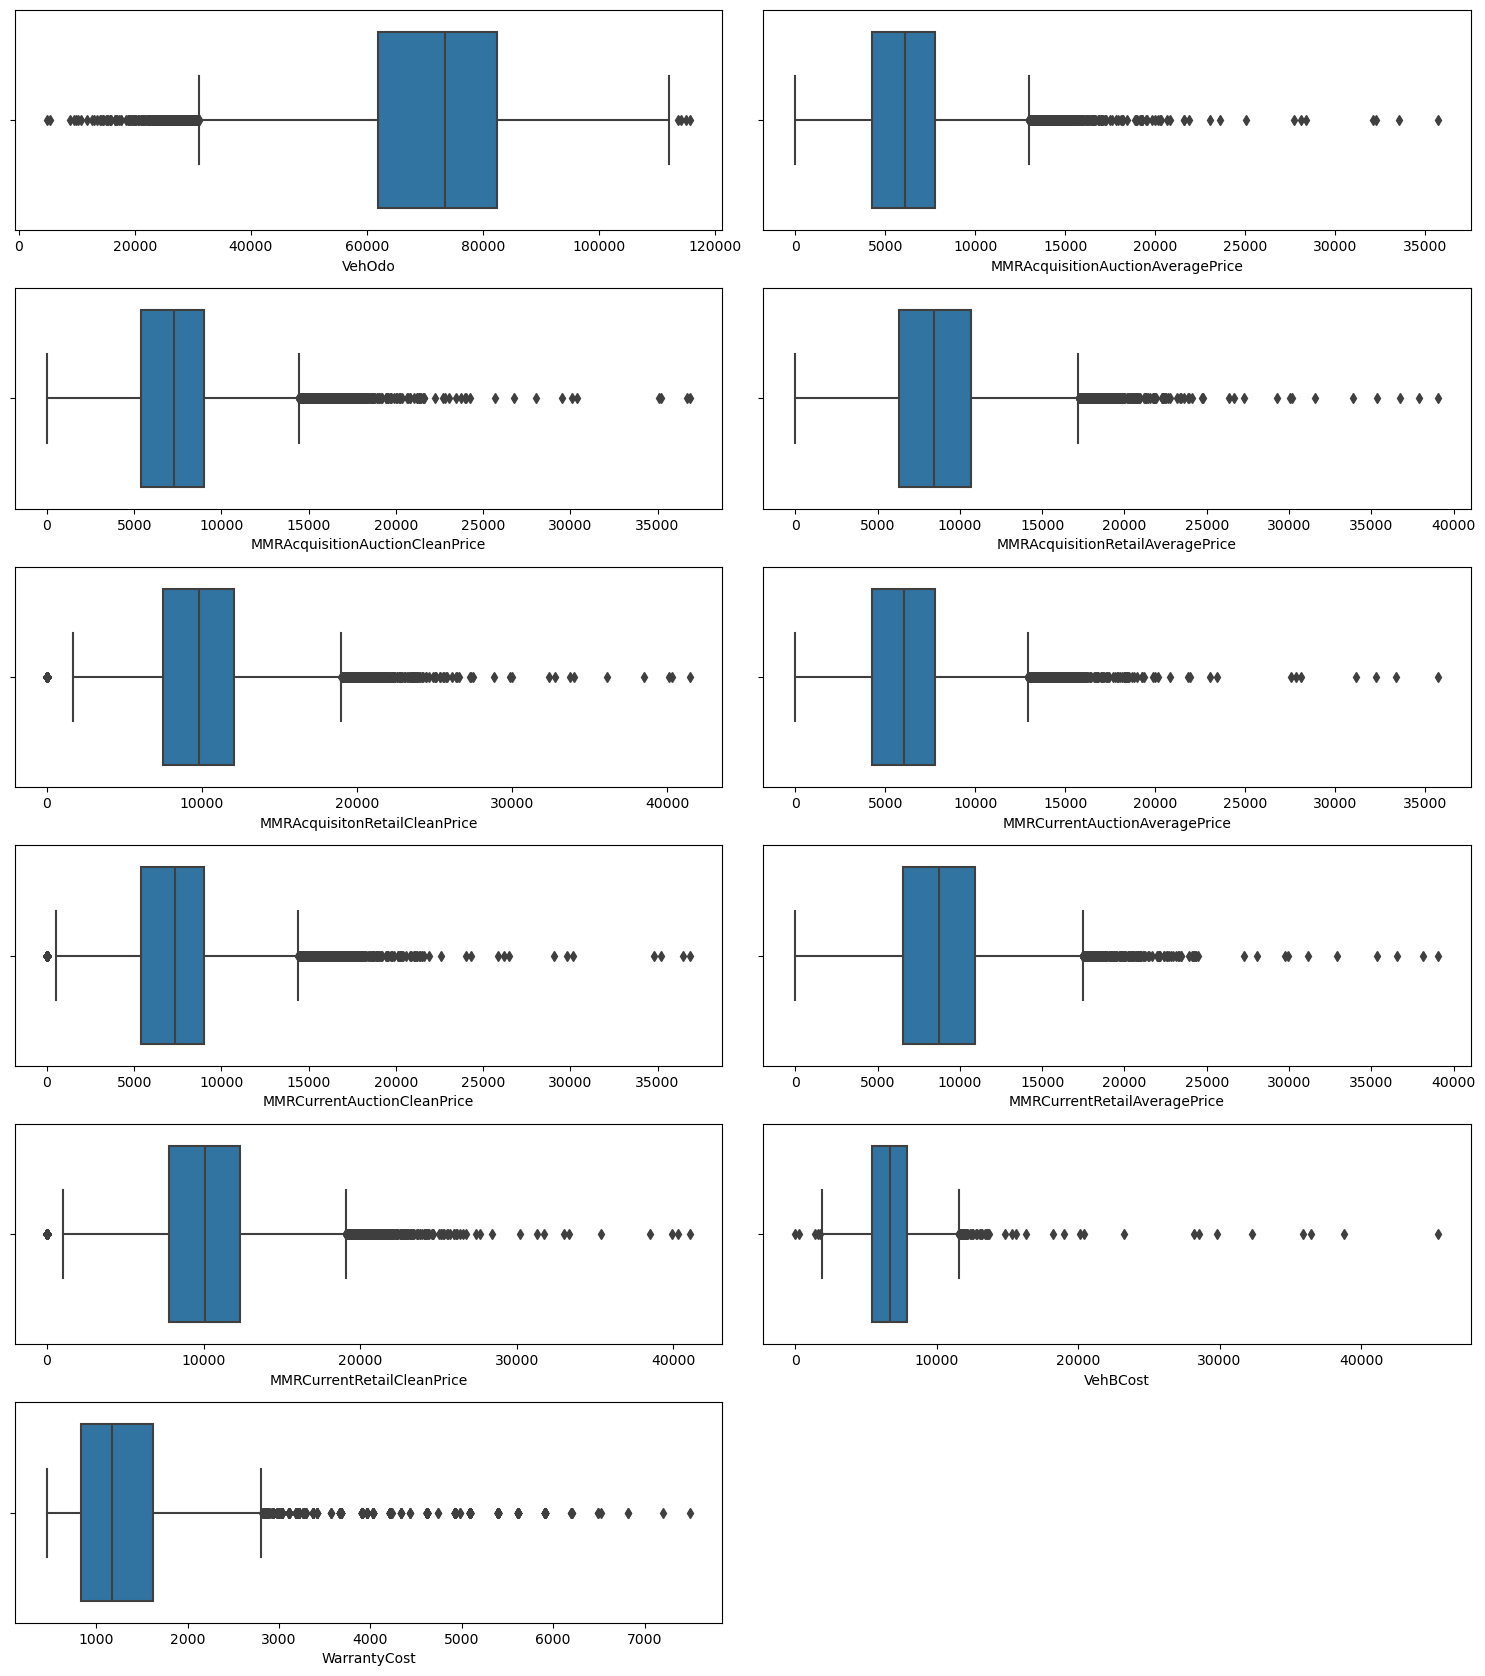

In [122]:
t=1
for i in num:
    plt.subplot(8,2,t)
    sns.boxplot(x=dff[i])
    t+=1

plt.tight_layout()
plt.show()

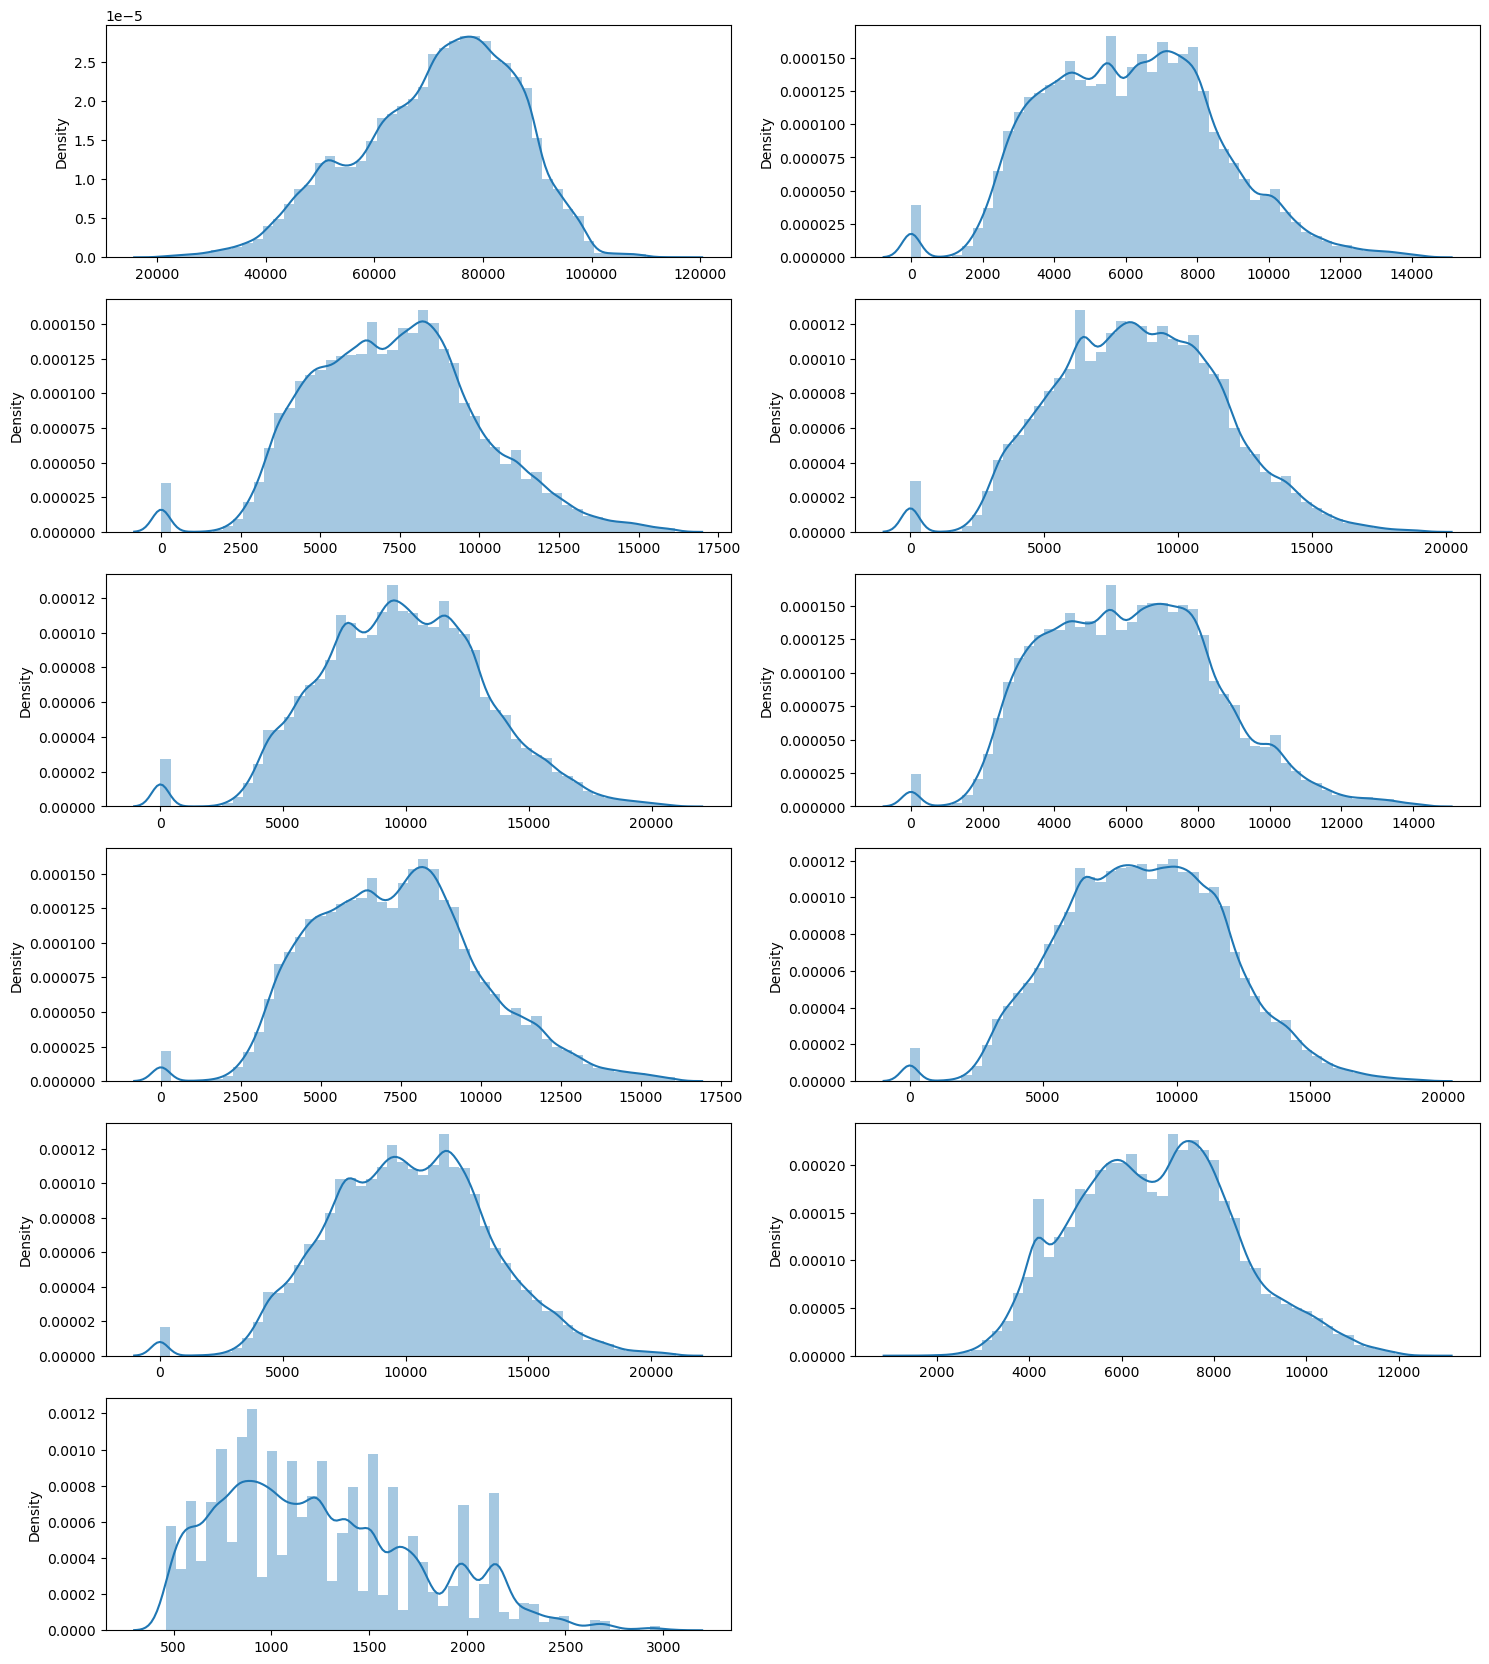

In [123]:
t=1
for i in num:
    plt.subplot(8,2,t)
    sns.distplot(x=df[i])
    t+=1

plt.tight_layout()
plt.show()

In [124]:
df[num].skew()

VehOdo                              -0.432009
MMRAcquisitionAuctionAveragePrice    0.209995
MMRAcquisitionAuctionCleanPrice      0.209442
MMRAcquisitionRetailAveragePrice     0.077727
MMRAcquisitonRetailCleanPrice        0.024282
MMRCurrentAuctionAveragePrice        0.278643
MMRCurrentAuctionCleanPrice          0.278893
MMRCurrentRetailAveragePrice         0.073880
MMRCurrentRetailCleanPrice           0.050689
VehBCost                             0.216498
WarrantyCost                         0.587324
dtype: float64

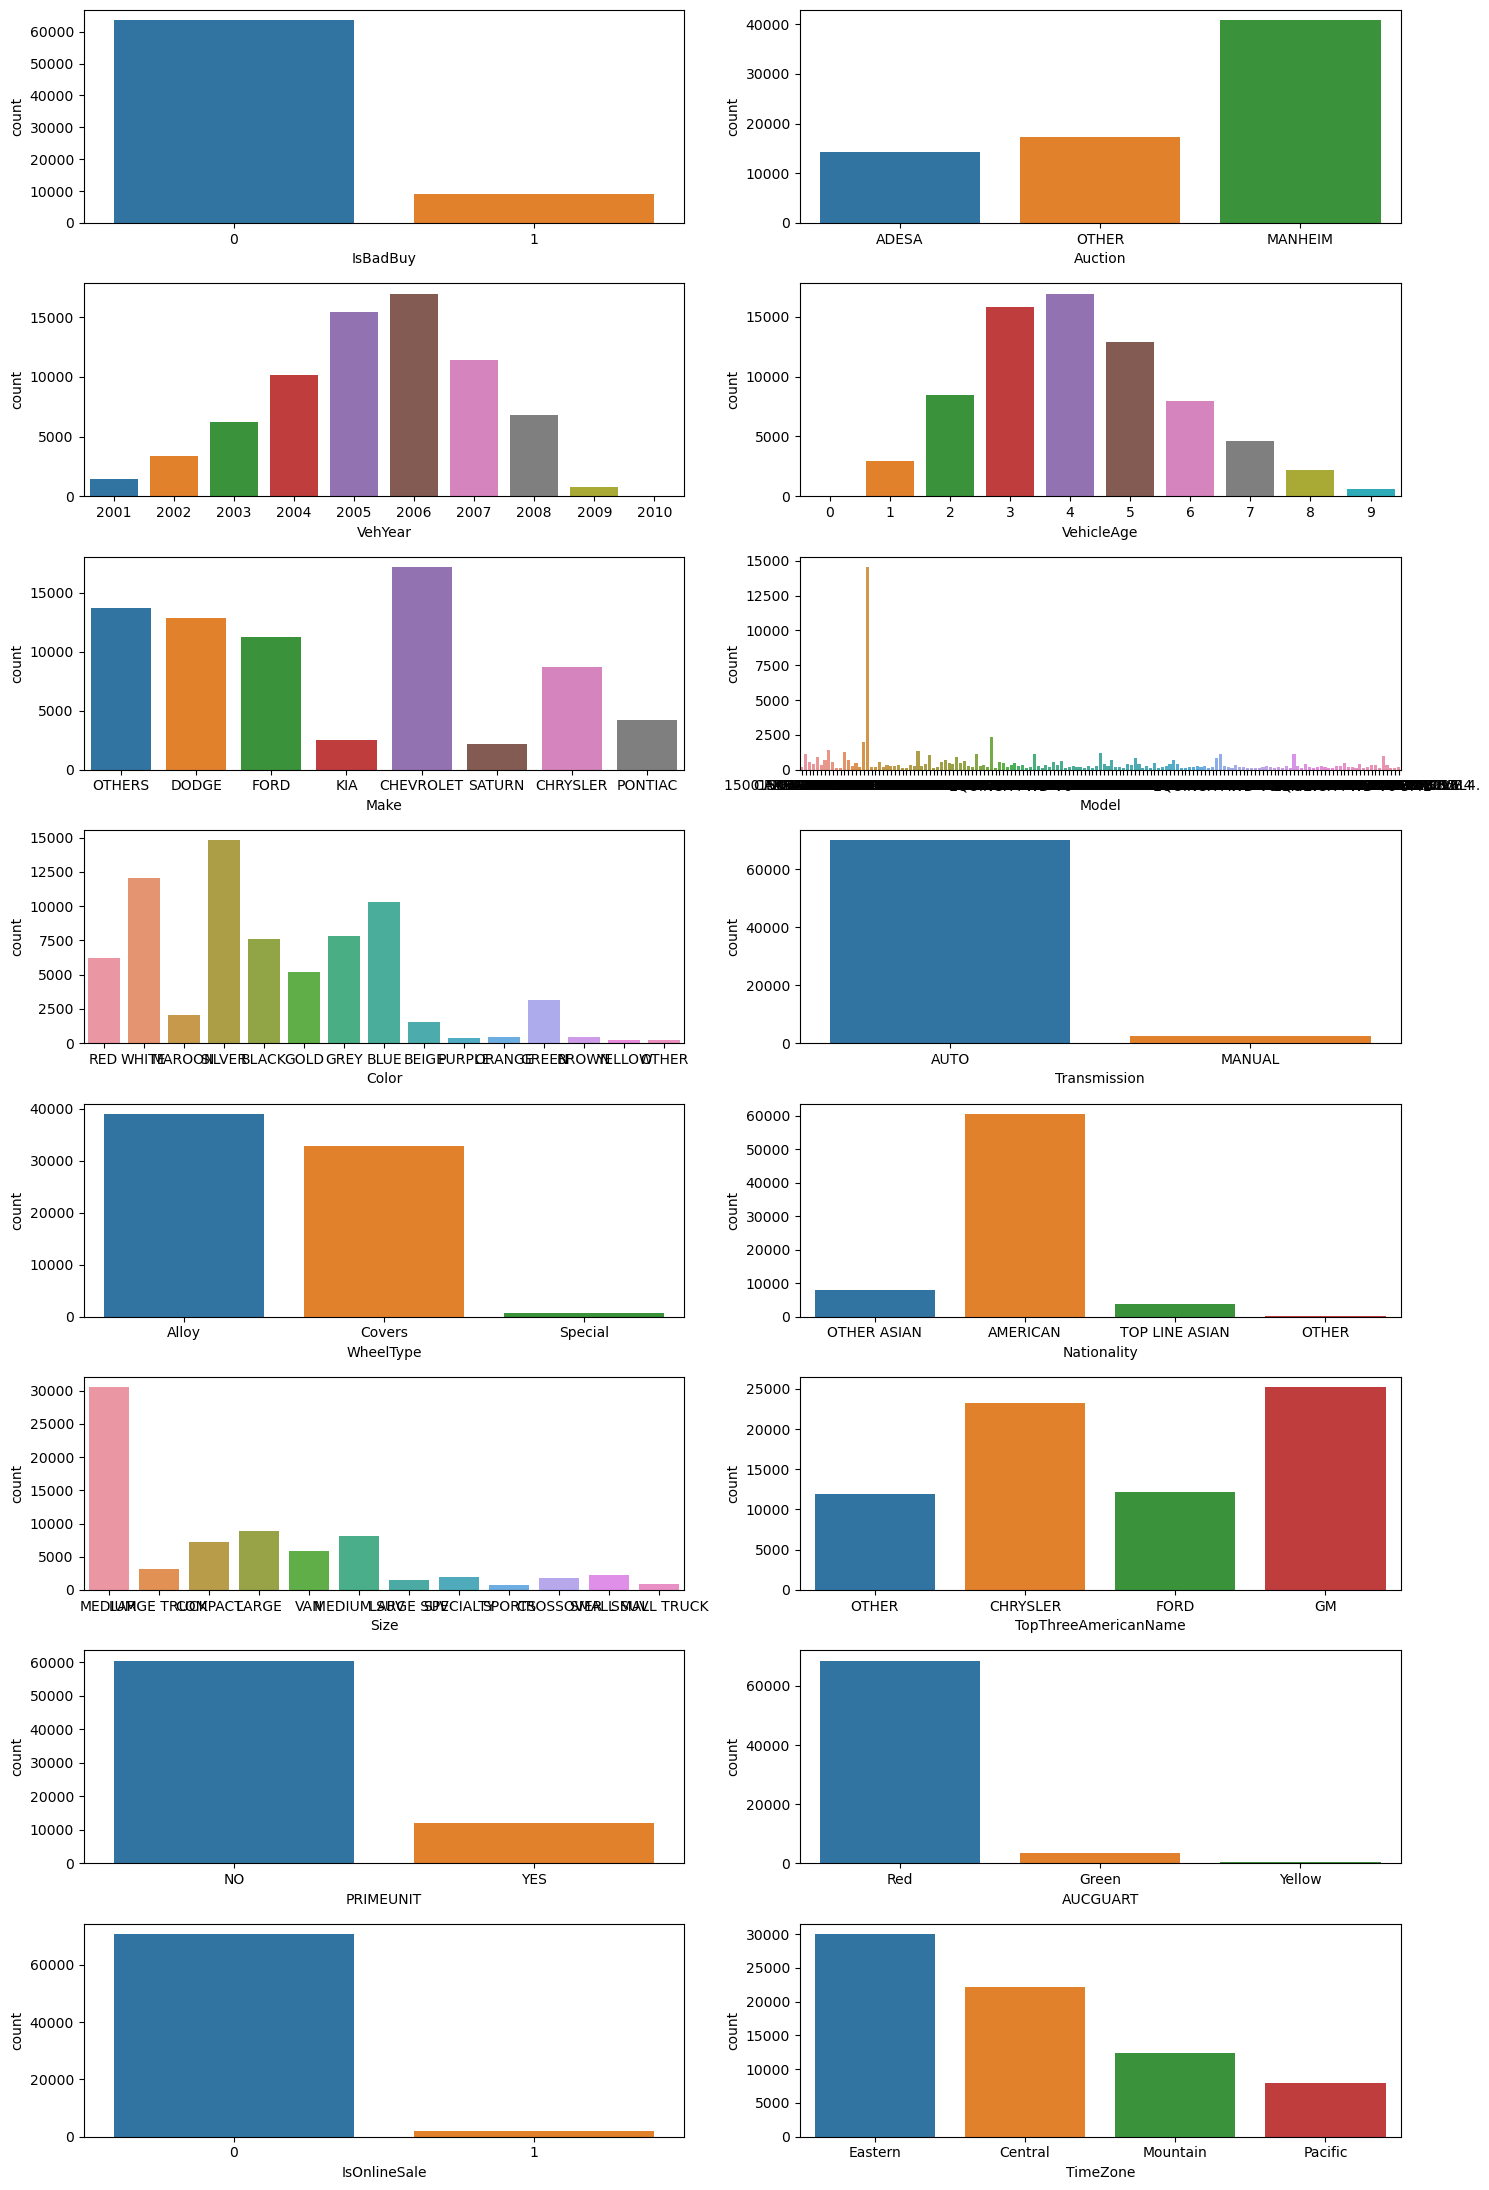

In [125]:
t=1
for i in cat:
    plt.subplot(8,2,t)
    sns.countplot(x=df[i])
    t+=1

plt.tight_layout()
plt.show()

In [126]:
df.columns

Index(['IsBadBuy', 'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model',
       'Color', 'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'MONTHS_SINCE_PURCHASE', 'TimeZone'],
      dtype='object')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72569 entries, 0 to 72568
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           72569 non-null  object 
 1   Auction                            72569 non-null  object 
 2   VehYear                            72569 non-null  object 
 3   VehicleAge                         72569 non-null  object 
 4   Make                               72569 non-null  object 
 5   Model                              72569 non-null  object 
 6   Color                              72569 non-null  object 
 7   Transmission                       72569 non-null  object 
 8   WheelType                          72569 non-null  object 
 9   VehOdo                             72569 non-null  float64
 10  Nationality                        72569 non-null  object 
 11  Size                               72569 non-null  obj

In [128]:
df['MONTHS_SINCE_PURCHASE'].isnull().sum()

321

In [129]:
df['MONTHS_SINCE_PURCHASE'].fillna(round(df['MONTHS_SINCE_PURCHASE'].median()),inplace=True)

In [130]:
df[['VehYear','VehicleAge','IsOnlineSale']]=df[['VehYear','VehicleAge','IsOnlineSale']].astype('object')

In [131]:
df[['VehYear','VehicleAge','IsOnlineSale']]

,VehYear,VehicleAge,IsOnlineSale
0,2006,3,0
1,2004,5,0
2,2005,4,0
3,2004,5,0
4,2005,4,0
...,...,...,...
72564,2001,8,0
72565,2007,2,0
72566,2005,4,0
72567,2006,3,0


In [132]:
df[['IsBadBuy','IsOnlineSale']]=df[['IsBadBuy','IsOnlineSale']].astype('int')

# Checking for Multicollinearity

In [133]:
num=df.select_dtypes(include=np.number).columns.to_list()

<Axes: >

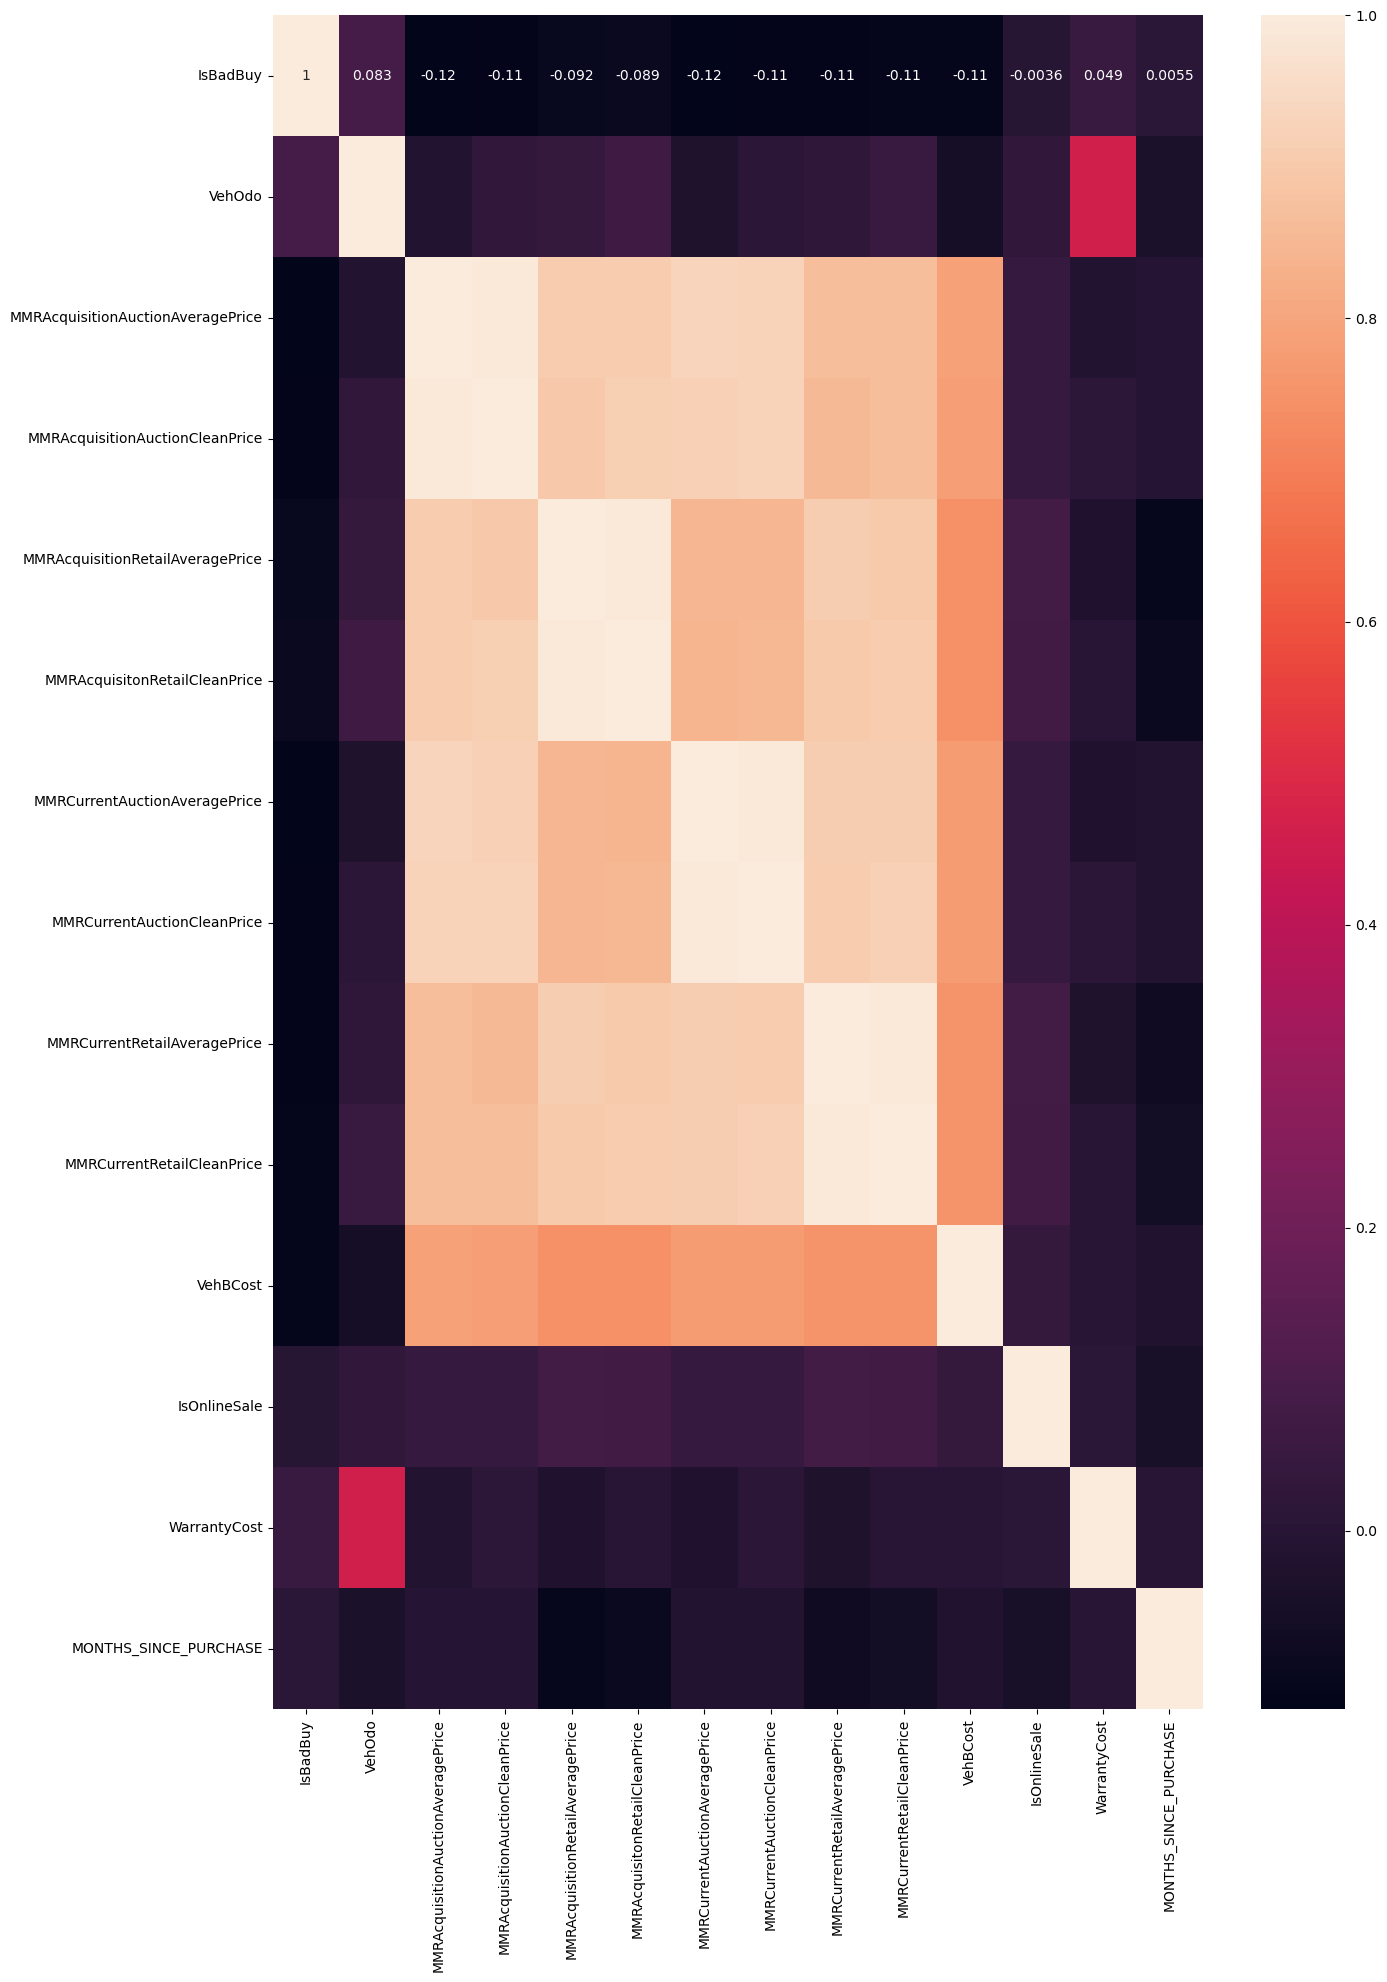

In [134]:
sns.heatmap(df[num].corr(),annot=True)

# scaling the data to perform ridge and lasso

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
dfff=df.copy()

In [137]:
a=['IsBadBuy', 'IsOnlineSale','MONTHS_SINCE_PURCHASE']

In [138]:
for i in a:
    num.remove(i)

In [139]:
sc=StandardScaler()
df[num]=pd.DataFrame(sc.fit_transform(df[num]),columns=num)
df[num]

,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost
0,1.205472,0.850993,0.934798,1.008663,1.126337,0.562479,0.453997,0.926565,0.697530,0.214634,-0.277995
1,1.518722,0.309419,0.389143,0.771662,0.818206,0.564583,0.710654,0.853564,0.814584,0.502439,-0.395918
2,0.155635,-1.210818,-0.978013,-0.496405,-0.415215,-0.875229,-0.693298,-0.530512,-0.438386,-1.051712,0.264454
3,-0.408587,-1.755722,-1.764797,-1.229216,-1.244590,-1.797365,-1.808415,-1.437625,-1.414041,-1.512202,-1.227279
4,-0.150244,-0.914846,-0.867071,-0.246255,-0.340281,-1.206878,-1.142639,-0.663747,-0.680768,-1.569763,-0.460776
...,...,...,...,...,...,...,...,...,...,...,...
72564,-1.812802,-1.712845,-1.644799,-1.871267,-1.831477,-1.651742,-1.651739,-1.286712,-1.285650,-1.454641,-0.513842
72565,0.014545,0.127923,-0.010098,-0.339901,-0.429003,0.282176,0.293107,0.453204,0.465567,-0.303417,-0.425399
72566,1.167857,1.013341,0.983854,0.397079,0.423751,0.951367,0.932834,1.003168,1.308234,0.847806,1.255012
72567,0.551554,0.128756,0.095184,-0.338939,-0.338782,0.200106,0.121492,0.436181,0.335643,0.157072,1.414208


# ENCODING

In [140]:
df[['IsOnlineSale','MONTHS_SINCE_PURCHASE']]=df[['IsOnlineSale','MONTHS_SINCE_PURCHASE']].astype('object')

In [141]:
cat=df.select_dtypes(exclude=np.number).columns.to_list()

In [142]:
cat

['Auction',
 'VehYear',
 'VehicleAge',
 'Make',
 'Model',
 'Color',
 'Transmission',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'PRIMEUNIT',
 'AUCGUART',
 'IsOnlineSale',
 'MONTHS_SINCE_PURCHASE',
 'TimeZone']

In [143]:
df=pd.get_dummies(data=df,columns=cat,drop_first=True,dtype='int')

# model building

In [144]:
x=df.drop(columns='IsBadBuy')
y=df['IsBadBuy']

In [145]:
y.value_counts()

IsBadBuy
0    63650
1     8919
Name: count, dtype: int64

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=46)

# Logistic regression

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
lr=LogisticRegression()
train_model=lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)


In [150]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [151]:
perf_score1=pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1 Score'])

In [152]:
def perf_measures(test, pred):
    acc=accuracy_score(test,pred)
    rec=recall_score(test,pred)
    prec=precision_score(test,pred)
    f1=f1_score(test,pred)
    return acc, rec, prec, f1

In [153]:
def update_performance(name, test, pred):
    global perf_score1
    perf_score1=pd.concat([perf_score1,pd.DataFrame({'Model' :[name],
                                                   'Accuracy' : [perf_measures(test,pred)[0]],
                                                   'Recall' : [perf_measures(test,pred)[1]],
                                                   'Precision' : [perf_measures(test,pred)[2]],
                                                   'F1 Score' : [perf_measures(test,pred)[3]]
                                                  })],

                                                ignore_index=True)
    

In [154]:
update_performance(name='LogisticReg-base', test=ytest,pred=y_pred)
perf_score1

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-base,0.880943,0.005211,0.473684,0.010309


In [155]:
CW = {0: 0.571, 1: 4.077}
lr1=LogisticRegression(class_weight= CW)
train_model1=lr1.fit(xtrain,ytrain)
y_pred_class_weight=lr1.predict(xtest)


In [156]:
update_performance(name='LogisticReg-class_weight', test=ytest,pred=y_pred_class_weight)
perf_score1

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-base,0.880943,0.005211,0.473684,0.010309
1,LogisticReg-class_weight,0.637729,0.644470,0.193330,0.297435


# Finding the best regularization strength using grid search cv

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
param_Grid={'C':[0.01,0.001,0.1,1,10,100,0.5,0.05,0.2,0.02]}
grid_search_cv=GridSearchCV(LogisticRegression(penalty='l2'),param_Grid,cv=5)
grid_search_cv.fit(xtrain,ytrain)
grid_search_cv.best_params_['C']

0.001

# Improving the performance of the model by using ridge and lasso

In [250]:
lr2=LogisticRegression(penalty='l2',C=0.001,class_weight=CW)
train_model_ridge=lr2.fit(xtrain,ytrain)
y_pred_ridge=lr2.predict(xtest)
ytrain_pred_ridge = lr2.predict(xtrain)

In [251]:
print(classification_report(ytrain,ytrain_pred_ridge))

              precision    recall  f1-score   support

           0       0.93      0.63      0.75     50863
           1       0.20      0.64      0.30      7192

    accuracy                           0.63     58055
   macro avg       0.56      0.64      0.53     58055
weighted avg       0.84      0.63      0.69     58055



In [252]:
print(classification_report(ytest,y_pred_ridge))

              precision    recall  f1-score   support

           0       0.93      0.63      0.75     12787
           1       0.19      0.63      0.29      1727

    accuracy                           0.63     14514
   macro avg       0.56      0.63      0.52     14514
weighted avg       0.84      0.63      0.69     14514



In [160]:
update_performance(name='LogisticReg-Rigdemodel', test=ytest,pred=y_pred_ridge)
perf_score1

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-base,0.880943,0.005211,0.473684,0.010309
1,LogisticReg-class_weight,0.637729,0.644470,0.193330,0.297435
2,LogisticReg-Rigdemodel,0.881011,0.000000,0.000000,0.000000


# Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
RandomForestClassifier()

RandomForestClassifier()

In [163]:
#sfs

In [164]:
param_Grid={'n_estimators':[100,150],'criterion':['gini','entropy'],'max_depth':[3,5],'min_samples_split':[2,5], 'min_samples_leaf':[3,6],"max_features":[0.2]}
grid_search_cv=GridSearchCV(RandomForestClassifier(class_weight= CW),param_Grid,cv=5)
grid_search_cv.fit(xtrain,ytrain)
grid_search_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 0.2,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 150}

In [165]:
rf_grid_search=grid_search_cv.best_estimator_
rf_grid_search

RandomForestClassifier(class_weight={0: 0.571, 1: 4.077}, criterion='entropy',
                       max_depth=3, max_features=0.2, min_samples_leaf=6,
                       min_samples_split=5, n_estimators=150)

In [166]:
rf_xtest=rf_grid_search.predict(xtest)
rf_xtrain=rf_grid_search.predict(xtrain)

In [167]:
from sklearn.metrics import classification_report

In [168]:
print(classification_report(ytrain,rf_xtrain))


              precision    recall  f1-score   support

           0       0.92      0.65      0.76     50863
           1       0.19      0.58      0.29      7192

    accuracy                           0.64     58055
   macro avg       0.55      0.62      0.53     58055
weighted avg       0.83      0.64      0.70     58055



In [169]:
print(classification_report(ytest,rf_xtest))


              precision    recall  f1-score   support

           0       0.92      0.65      0.76     12787
           1       0.18      0.56      0.27      1727

    accuracy                           0.64     14514
   macro avg       0.55      0.60      0.51     14514
weighted avg       0.83      0.64      0.70     14514



In [170]:
Feature_imp = pd.DataFrame()
Feature_imp["Columns"] = xtrain.columns
Feature_imp["Importance"] = rf_grid_search.feature_importances_

In [171]:
xtrain_top_50 = xtrain[Feature_imp.sort_values(by = "Importance",ascending = False).head(50)["Columns"].to_list()]

In [172]:
xtest_top_50 = xtest[Feature_imp.sort_values(by = "Importance",ascending = False).head(50)["Columns"].to_list()]

In [173]:
update_performance(name='Random_forest_param_tuned', test=ytest,pred=rf_xtest)
perf_score1

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-base,0.880943,0.005211,0.473684,0.010309
1,LogisticReg-class_weight,0.637729,0.644470,0.193330,0.297435
2,LogisticReg-Rigdemodel,0.881011,0.000000,0.000000,0.000000
3,Random_forest_param_tuned,0.639038,0.559931,0.177562,0.269622


# Ada Boost without sample weights

In [174]:
from sklearn.ensemble import AdaBoostClassifier

In [175]:
a=AdaBoostClassifier()
a.fit(xtrain,ytrain)
ada_xtest=a.predict(xtest)
ada_xtrain=a.predict(xtrain)

In [176]:
print(classification_report(ytrain,ada_xtrain))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     50863
           1       0.00      0.00      0.00      7192

    accuracy                           0.88     58055
   macro avg       0.44      0.50      0.47     58055
weighted avg       0.77      0.88      0.82     58055



In [177]:
print(classification_report(ytest,ada_xtest))
#The recall for the 1st class which tells about the car being bad is zero which means that the class is  
#not even predicted correctly

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     12787
           1       0.00      0.00      0.00      1727

    accuracy                           0.88     14514
   macro avg       0.44      0.50      0.47     14514
weighted avg       0.78      0.88      0.83     14514



# Ada-Boost with sample weights

In [178]:
CW = {0: 0.571, 1: 4.077}

In [179]:
y_sample_weight = np.array(ytrain)

In [180]:
sw = np.array([CW[i] for i in y_sample_weight]) 

In [181]:
len(sw)

58055

In [182]:
a=AdaBoostClassifier()
a.fit(xtrain_top_50,ytrain,sample_weight=sw)
ada_xtest=a.predict(xtest_top_50)
ada_xtrain=a.predict(xtrain_top_50)

In [183]:
print(classification_report(ytrain,ada_xtrain))


              precision    recall  f1-score   support

           0       0.93      0.59      0.72     50863
           1       0.19      0.67      0.29      7192

    accuracy                           0.60     58055
   macro avg       0.56      0.63      0.51     58055
weighted avg       0.83      0.60      0.67     58055



In [184]:
print(classification_report(ytest,ada_xtest))


              precision    recall  f1-score   support

           0       0.92      0.58      0.72     12787
           1       0.17      0.65      0.27      1727

    accuracy                           0.59     14514
   macro avg       0.55      0.61      0.49     14514
weighted avg       0.83      0.59      0.66     14514



In [185]:
update_performance(name='AdaBoost', test=ytest,pred=ada_xtest)
perf_score1

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-base,0.880943,0.005211,0.473684,0.010309
1,LogisticReg-class_weight,0.637729,0.644470,0.193330,0.297435
2,LogisticReg-Rigdemodel,0.881011,0.000000,0.000000,0.000000
3,Random_forest_param_tuned,0.639038,0.559931,0.177562,0.269622
4,AdaBoost,0.591636,0.645049,0.173304,0.273207


# Ada-Boost-Parameter-Tuning

In [186]:
param_Grid={'n_estimators':[100,150],
            'learning_rate':[0.1,0.01]}
grid_search_cv=GridSearchCV(AdaBoostClassifier(),param_Grid,cv=5)
grid_search_cv.fit(xtrain_top_50,ytrain,sample_weight = sw)  
grid_search_cv.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [187]:
ada_grid_search=grid_search_cv.best_estimator_

In [188]:
ada_gs_xtest=ada_grid_search.predict(xtest_top_50)
ada_gs_xtrain=ada_grid_search.predict(xtrain_top_50)

In [189]:
print(classification_report(ytrain,ada_gs_xtrain))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81     50863
           1       0.20      0.48      0.28      7192

    accuracy                           0.70     58055
   macro avg       0.55      0.60      0.55     58055
weighted avg       0.82      0.70      0.75     58055



In [190]:
print(classification_report(ytest,ada_gs_xtest))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81     12787
           1       0.18      0.45      0.26      1727

    accuracy                           0.70     14514
   macro avg       0.55      0.59      0.54     14514
weighted avg       0.82      0.70      0.74     14514



In [191]:
update_performance(name='AdaBoost_tuned_param', test=ytest,pred=ada_gs_xtest)
perf_score1

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-base,0.880943,0.005211,0.473684,0.010309
1,LogisticReg-class_weight,0.637729,0.644470,0.193330,0.297435
2,LogisticReg-Rigdemodel,0.881011,0.000000,0.000000,0.000000
3,Random_forest_param_tuned,0.639038,0.559931,0.177562,0.269622
4,AdaBoost,0.591636,0.645049,0.173304,0.273207
5,AdaBoost_tuned_param,0.697602,0.447018,0.183547,0.260239


# Gradient-Boosting

In [192]:
from sklearn.ensemble import GradientBoostingClassifier

In [193]:
Gb=GradientBoostingClassifier()
Gb.fit(xtrain_top_50,ytrain,sample_weight=sw)
Gb_xtest=Gb.predict(xtest_top_50)
Gb_xtrain=Gb.predict(xtrain_top_50)

In [194]:
print(classification_report(ytrain,Gb_xtrain))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75     50863
           1       0.21      0.70      0.32      7192

    accuracy                           0.63     58055
   macro avg       0.57      0.66      0.54     58055
weighted avg       0.85      0.63      0.70     58055



In [195]:
print(classification_report(ytest,Gb_xtest))

              precision    recall  f1-score   support

           0       0.93      0.62      0.74     12787
           1       0.19      0.66      0.30      1727

    accuracy                           0.63     14514
   macro avg       0.56      0.64      0.52     14514
weighted avg       0.84      0.63      0.69     14514



In [196]:
update_performance(name='GradientBoostingClassifier', test=ytest,pred=Gb_xtest)
perf_score1

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-base,0.880943,0.005211,0.473684,0.010309
1,LogisticReg-class_weight,0.637729,0.644470,0.193330,0.297435
2,LogisticReg-Rigdemodel,0.881011,0.000000,0.000000,0.000000
3,Random_forest_param_tuned,0.639038,0.559931,0.177562,0.269622
4,AdaBoost,0.591636,0.645049,0.173304,0.273207
5,AdaBoost_tuned_param,0.697602,0.447018,0.183547,0.260239
6,GradientBoostingClassifier,0.625396,0.662999,0.190833,0.296363


# Gradient-Boosting-tuned-paramters

In [197]:
param_Grid={'n_estimators':[100,150],'max_depth':[3,5],'min_samples_split':[3,5], 'min_samples_leaf':[3,5],
            'learning_rate':[0.1,0.01]}
grid_search_cv=GridSearchCV(GradientBoostingClassifier(),param_Grid,cv=5)
grid_search_cv.fit(xtrain_top_50,ytrain,sample_weight = sw)
grid_search_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 150}

In [198]:
GBTP_grid_search=grid_search_cv.best_estimator_
GBTP_grid_search

GradientBoostingClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                           n_estimators=150)

In [199]:
GB_gs_xtest=GBTP_grid_search.predict(xtest_top_50)
GB_gs_xtrain=GBTP_grid_search.predict(xtrain_top_50)

In [200]:
print(classification_report(ytrain,GB_gs_xtrain))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     50863
           1       0.26      0.77      0.38      7192

    accuracy                           0.70     58055
   macro avg       0.61      0.73      0.59     58055
weighted avg       0.87      0.70      0.75     58055



In [201]:
print(classification_report(ytest,GB_gs_xtest))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78     12787
           1       0.21      0.63      0.31      1727

    accuracy                           0.67     14514
   macro avg       0.57      0.65      0.55     14514
weighted avg       0.84      0.67      0.72     14514



In [202]:
update_performance(name='GradientBoostingClassifier_tunnedPara', test=ytest,pred=GB_gs_xtest)
perf_score1

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-base,0.880943,0.005211,0.473684,0.010309
1,LogisticReg-class_weight,0.637729,0.644470,0.193330,0.297435
2,LogisticReg-Rigdemodel,0.881011,0.000000,0.000000,0.000000
3,Random_forest_param_tuned,0.639038,0.559931,0.177562,0.269622
4,AdaBoost,0.591636,0.645049,0.173304,0.273207
5,AdaBoost_tuned_param,0.697602,0.447018,0.183547,0.260239
6,GradientBoostingClassifier,0.625396,0.662999,0.190833,0.296363
7,GradientBoostingClassifier_tunnedPara,0.666322,0.630573,0.205705,0.310212


# XGBoost

In [203]:
#!pip install xgboost

import xgboost as xgb


In [204]:
from xgboost import XGBClassifier

In [205]:
XGB=XGBClassifier()
XGB.fit(xtrain_top_50,ytrain,sample_weight=sw)
XGB_xtest=XGB.predict(xtest_top_50)
XGB_xtrain=XGB.predict(xtrain_top_50)

In [206]:
print(classification_report(ytrain,XGB_xtrain))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87     50863
           1       0.36      0.88      0.51      7192

    accuracy                           0.79     58055
   macro avg       0.67      0.83      0.69     58055
weighted avg       0.90      0.79      0.82     58055



In [207]:
print(classification_report(ytest,XGB_xtest))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82     12787
           1       0.22      0.55      0.32      1727

    accuracy                           0.72     14514
   macro avg       0.57      0.64      0.57     14514
weighted avg       0.84      0.72      0.76     14514



In [208]:
update_performance(name='XGBClassifier', test=ytest,pred=XGB_xtest)
perf_score1

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-base,0.880943,0.005211,0.473684,0.010309
1,LogisticReg-class_weight,0.637729,0.644470,0.193330,0.297435
2,LogisticReg-Rigdemodel,0.881011,0.000000,0.000000,0.000000
3,Random_forest_param_tuned,0.639038,0.559931,0.177562,0.269622
4,AdaBoost,0.591636,0.645049,0.173304,0.273207
5,AdaBoost_tuned_param,0.697602,0.447018,0.183547,0.260239
6,GradientBoostingClassifier,0.625396,0.662999,0.190833,0.296363
7,GradientBoostingClassifier_tunnedPara,0.666322,0.630573,0.205705,0.310212
8,XGBClassifier,0.718479,0.548350,0.222666,0.316722


# XGBOOST PARAMETER TUNING

In [209]:
# pip install -U scikit-learn xgboost

In [210]:
param_Grid={'n_estimators':[100,150],'max_depth':[3,5],
            'learning_rate':[0.1,0.01],'gamma':[3,5]}
grid_search_cv=GridSearchCV(XGBClassifier(),param_Grid,cv=5)
grid_search_cv.fit(xtrain_top_50,ytrain,sample_weight = sw)
grid_search_cv.best_params_

{'gamma': 3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}

In [211]:
XGB_grid_search=grid_search_cv.best_estimator_

In [212]:
XGB_gs_xtest=XGB_grid_search.predict(xtest_top_50)
XGB_gs_xtrain=XGB_grid_search.predict(xtrain_top_50)

In [213]:
print(classification_report(ytrain,XGB_gs_xtrain))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     50863
           1       0.23      0.74      0.35      7192

    accuracy                           0.66     58055
   macro avg       0.59      0.70      0.56     58055
weighted avg       0.86      0.66      0.72     58055



In [214]:
print(classification_report(ytest,XGB_gs_xtest))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76     12787
           1       0.20      0.66      0.31      1727

    accuracy                           0.64     14514
   macro avg       0.57      0.65      0.53     14514
weighted avg       0.85      0.64      0.71     14514



In [215]:
update_performance(name='XGB_tunedParam', test=ytest,pred=XGB_gs_xtest)
perf_score1

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-base,0.880943,0.005211,0.473684,0.010309
1,LogisticReg-class_weight,0.637729,0.644470,0.193330,0.297435
2,LogisticReg-Rigdemodel,0.881011,0.000000,0.000000,0.000000
3,Random_forest_param_tuned,0.639038,0.559931,0.177562,0.269622
4,AdaBoost,0.591636,0.645049,0.173304,0.273207
5,AdaBoost_tuned_param,0.697602,0.447018,0.183547,0.260239
6,GradientBoostingClassifier,0.625396,0.662999,0.190833,0.296363
7,GradientBoostingClassifier_tunnedPara,0.666322,0.630573,0.205705,0.310212
8,XGBClassifier,0.718479,0.548350,0.222666,0.316722
9,XGB_tunedParam,0.644619,0.658946,0.199404,0.306161


# Parameter tuning with regularization parameter

In [242]:
param_Grid={'n_estimators':[100,150],'max_depth':[3,5],
            'learning_rate':[0.1,0.01],'gamma':[3,5],"reg_lambda":[2]}
grid_search_cv=GridSearchCV(XGBClassifier(),param_Grid,cv=5)
grid_search_cv.fit(xtrain_top_50,ytrain,sample_weight = sw)
grid_search_cv.best_params_

{'gamma': 3,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 150,
 'reg_lambda': 100}

In [243]:
XGB_grid_search=grid_search_cv.best_estimator_

In [244]:
XGB_gs_xtest=XGB_grid_search.predict(xtest_top_50)
XGB_gs_xtrain=XGB_grid_search.predict(xtrain_top_50)

In [245]:
print(classification_report(ytrain,XGB_gs_xtrain))

              precision    recall  f1-score   support

           0       0.94      0.65      0.77     50863
           1       0.22      0.71      0.34      7192

    accuracy                           0.65     58055
   macro avg       0.58      0.68      0.55     58055
weighted avg       0.85      0.65      0.71     58055



In [246]:
print(classification_report(ytest,XGB_gs_xtest))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76     12787
           1       0.20      0.66      0.30      1727

    accuracy                           0.64     14514
   macro avg       0.56      0.65      0.53     14514
weighted avg       0.85      0.64      0.70     14514

